In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Laporan hasil Rumah Kompos gabungan.csv")
df

Tahun      Bulan  Sampah Daun  Sampah Sayuran  Sampah Anorganik  \
0    2020    January         1403             433                36   
1    2020   February         3130             605                28   
2    2020      March         1662             295                23   
3    2020      April         1480             844                28   
4    2020        May          857            1596                78   
5    2020       June         1039            1234                70   
6    2020       July         1890             610                48   
7    2020     August         1343             866                37   
8    2020  September         1979             887                18   
9    2020    October          734            1481               172   
10   2020   November         1773            2247               228   
11   2020   December         2915            1000               130   
12   2021    January         3440             804               190   
13   2021   February         2525            1057               202   
14   2021      March         2800            1769               277   
15   2021      April         2285            1534               380   
16   2021        May         2425            1593                 0   
17   2021       June          590            1296                 0   
18   2021       July         1460             779                 0   
19   2021     August         2028             858                89   
20   2021  September         1590            1604               147   
21   2021    October         2450            1561               134   
22   2021   November         1590            1211               176   
23   2021   December          940            1346                 0   
24   2022    January         3055             804               190   
25   2022   February         2525            1069               160   
26   2022      March         2800            1769               277   
27   2022      April         1600            1773               260   
28   2022        May         2425            1593                 0   
29   2022       June          590            1296                 0   
30   2022       July         1460             779                 0   
31   2022     August         2028             858                89   
32   2022  September         1590            1604               147   
33   2022    October         2450            1561               134   
34   2022   November         1773            2247               228   
35   2022   December         2915             911               130   
36   2023    January         1210            1064                 0   
37   2023   February          260            1164                 0   
38   2023      March          140            1041                 0   
39   2023      April          490             856                 0   
40   2023        May          610            1582                 0   
41   2023       June         1240            1537                 0   
42   2023       July         1150            1356                 0   
43   2023     August          942            1356                 0   
44   2023  September         1230            1514                 0   
45   2023    October         1300            1374                 0   
46   2023   November         1250            1245                 0   
47   2023   December         2200            1208                 0   
48   2024    January         2330            1269               930   
49   2024   February         3120            2381               752   

    Daun Terolah  Sampah Fermentasi  Kompos Jadi  
0           1043               1723          150  
1           2275               1552          175  
2           1157               1476          150  
3           1111               1284         1010  
4            641               3257          950  
5            790               2776          675  
6           1359         

In [3]:
df['Timestamp'] = pd.to_datetime(df['Tahun'].astype(str) + ' ' + df['Bulan'])
df.head()

Tahun     Bulan  Sampah Daun  Sampah Sayuran  Sampah Anorganik  \
0   2020   January         1403             433                36   
1   2020  February         3130             605                28   
2   2020     March         1662             295                23   
3   2020     April         1480             844                28   
4   2020       May          857            1596                78   

   Daun Terolah  Sampah Fermentasi  Kompos Jadi  Timestamp  
0          1043               1723          150 2020-01-01  
1          2275               1552          175 2020-02-01  
2          1157               1476          150 2020-03-01  
3          1111               1284         1010 2020-04-01  
4           641               3257          950 2020-05-01

In [4]:
df = df.drop(columns=['Tahun', 'Bulan'])
df.head()

Sampah Daun  Sampah Sayuran  Sampah Anorganik  Daun Terolah  \
0         1403             433                36          1043   
1         3130             605                28          2275   
2         1662             295                23          1157   
3         1480             844                28          1111   
4          857            1596                78           641   

   Sampah Fermentasi  Kompos Jadi  Timestamp  
0               1723          150 2020-01-01  
1               1552          175 2020-02-01  
2               1476          150 2020-03-01  
3               1284         1010 2020-04-01  
4               3257          950 2020-05-01

In [5]:
cols = df.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

Timestamp  Sampah Daun  Sampah Sayuran  Sampah Anorganik  Daun Terolah  \
0  2020-01-01         1403             433                36          1043   
1  2020-02-01         3130             605                28          2275   
2  2020-03-01         1662             295                23          1157   
3  2020-04-01         1480             844                28          1111   
4  2020-05-01          857            1596                78           641   
5  2020-06-01         1039            1234                70           790   
6  2020-07-01         1890             610                48          1359   
7  2020-08-01         1343             866                37           975   
8  2020-09-01         1979             887                18          1419   
9  2020-10-01          734            1481               172           492   
10 2020-11-01         1773            2247               228          1230   
11 2020-12-01         2915            1000               130          2097   
12 2021-01-01         3440             804               190          2633   
13 2021-02-01         2525            1057               202          1037   
14 2021-03-01         2800            1769               277          1816   
15 2021-04-01         2285            1534               380          1435   
16 2021-05-01         2425            1593                 0          1132   
17 2021-06-01          590            1296                 0           664   
18 2021-07-01         1460             779                 0           665   
19 2021-08-01         2028             858                89          1091   
20 2021-09-01         1590            1604               147           696   
21 2021-10-01         2450            1561               134           969   
22 2021-11-01         1590            1211               176           598   
23 2021-12-01          940            1346                 0           500   
24 2022-01-01         3055             804               190          2466   
25 2022-02-01         2525            1069               160          1637   
26 2022-03-01         2800            1769               277          1816   
27 2022-04-01         1600            1773               260           839   
28 2022-05-01         2425            1593                 0          1132   
29 2022-06-01          590            1296                 0           664   
30 2022-07-01         1460             779                 0           665   
31 2022-08-01         2028             858                89          1091   
32 2022-09-01         1590            1604               147           696   
33 2022-10-01         2450            1561               134           969   
34 2022-11-01         1773            2247               228          1230   
35 2022-12-01         2915             911               130          2097   
36 2023-01-01         1210            1064                 0           495   
37 2023-02-01          260            1164                 0           120   
38 2023-03-01          140            1041                 0            60   
39 2023-04-01          490             856                 0           151   
40 2023-05-01          610            1582                 0           261   
41 2023-06-01         1240            1537                 0           627   
42 2023-07-01         1150            1356                 0           677   
43 2023-08-01          942            1356                 0           430   
44 2023-09-01         1230            1514                 0           527   
45 2023-10-01         1300            1374                 0           559   
46 2023-11-01         1250            1245                 0           638   
47 2023-12-01         2200            1208                 0          1200   
48 2024-01-01         2330            1269               930           846   
49 2024-02-01         3120            2381               752          1522   

    Sampah Fermentasi  Ko

In [6]:
df = df.drop(columns=['Sampah Anorganik'])
df.head()

Timestamp  Sampah Daun  Sampah Sayuran  Daun Terolah  Sampah Fermentasi  \
0 2020-01-01         1403             433          1043               1723   
1 2020-02-01         3130             605          2275               1552   
2 2020-03-01         1662             295          1157               1476   
3 2020-04-01         1480             844          1111               1284   
4 2020-05-01          857            1596           641               3257   

   Kompos Jadi  
0          150  
1          175  
2          150  
3         1010  
4          950

In [7]:
# Calculate the median of each column (excluding the 'Timestamp' column)
medians = df.median(numeric_only=True)

# Replace zero values with the median of their respective columns
df = df.apply(lambda col: col.replace(0, medians[col.name]) if col.name != 'Timestamp' else col)
df

Timestamp  Sampah Daun  Sampah Sayuran  Daun Terolah  Sampah Fermentasi  \
0  2020-01-01         1403             433          1043               1723   
1  2020-02-01         3130             605          2275               1552   
2  2020-03-01         1662             295          1157               1476   
3  2020-04-01         1480             844          1111               1284   
4  2020-05-01          857            1596           641               3257   
5  2020-06-01         1039            1234           790               2776   
6  2020-07-01         1890             610          1359               2390   
7  2020-08-01         1343             866           975               1564   
8  2020-09-01         1979             887          1419                884   
9  2020-10-01          734            1481           492               2697   
10 2020-11-01         1773            2247          1230               4055   
11 2020-12-01         2915            1000          2097               1950   
12 2021-01-01         3440             804          2633               1805   
13 2021-02-01         2525            1057          1037               1685   
14 2021-03-01         2800            1769          1816               3231   
15 2021-04-01         2285            1534          1435               3110   
16 2021-05-01         2425            1593          1132               2947   
17 2021-06-01          590            1296           664               2114   
18 2021-07-01         1460             779           665               1595   
19 2021-08-01         2028             858          1091               1438   
20 2021-09-01         1590            1604           696               2210   
21 2021-10-01         2450            1561           969               2369   
22 2021-11-01         1590            1211           598               2347   
23 2021-12-01          940            1346           500               2118   
24 2022-01-01         3055             804          2466               1805   
25 2022-02-01         2525            1069          1637               1685   
26 2022-03-01         2800            1769          1816               3231   
27 2022-04-01         1600            1773           839               3174   
28 2022-05-01         2425            1593          1132               2947   
29 2022-06-01          590            1296           664               2114   
30 2022-07-01         1460             779           665               1595   
31 2022-08-01         2028             858          1091               1438   
32 2022-09-01         1590            1604           696               2210   
33 2022-10-01         2450            1561           969               2369   
34 2022-11-01         1773            2247          1230               4055   
35 2022-12-01         2915             911          2097               1940   
36 2023-01-01         1210            1064           495               1340   
37 2023-02-01          260            1164           120               1347   
38 2023-03-01          140            1041            60                677   
39 2023-04-01          490             856           151               1006   
40 2023-05-01          610            1582           261               1625   
41 2023-06-01         1240            1537           627               2189   
42 2023-07-01         1150            1356           677               1390   
43 2023-08-01          942            1356           430               1385   
44 2023-09-01         1230            1514           527               1827   
45 2023-10-01         1300            1374           559               1682   
46 2023-11-01         1250            1245           638               1215   
47 2023-12-01         2200            1208          1200                547   
48 2024-01-01         2330            1269           846               1891   
49 2024-02-01         3120            2381          15

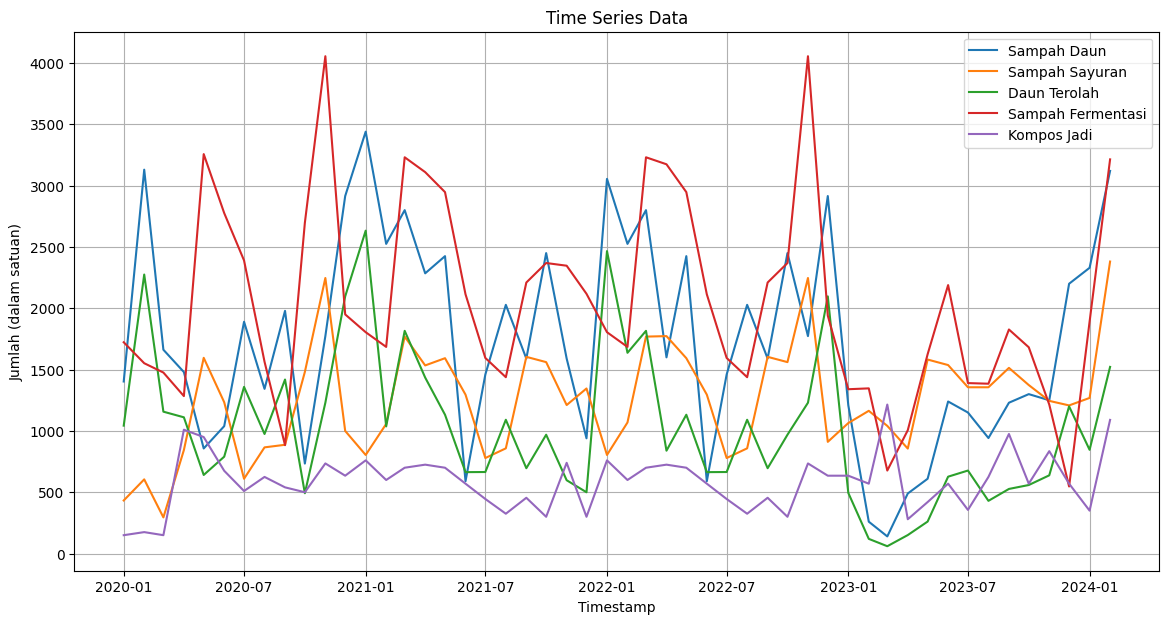

In [8]:
df_plot = df.copy()
df_plot.set_index('Timestamp', inplace=True)
# Membuat plot time series
plt.figure(figsize=(14, 7))
plt.plot(df_plot.index, df['Sampah Daun'], label='Sampah Daun')
plt.plot(df_plot.index, df['Sampah Sayuran'], label='Sampah Sayuran')
plt.plot(df_plot.index, df['Daun Terolah'], label='Daun Terolah')
plt.plot(df_plot.index, df['Sampah Fermentasi'], label='Sampah Fermentasi')
plt.plot(df_plot.index, df['Kompos Jadi'], label='Kompos Jadi')

# Menambahkan judul dan label
plt.title('Time Series Data')
plt.xlabel('Timestamp')
plt.ylabel('Jumlah (dalam satuan)')
plt.legend()
plt.grid(True)

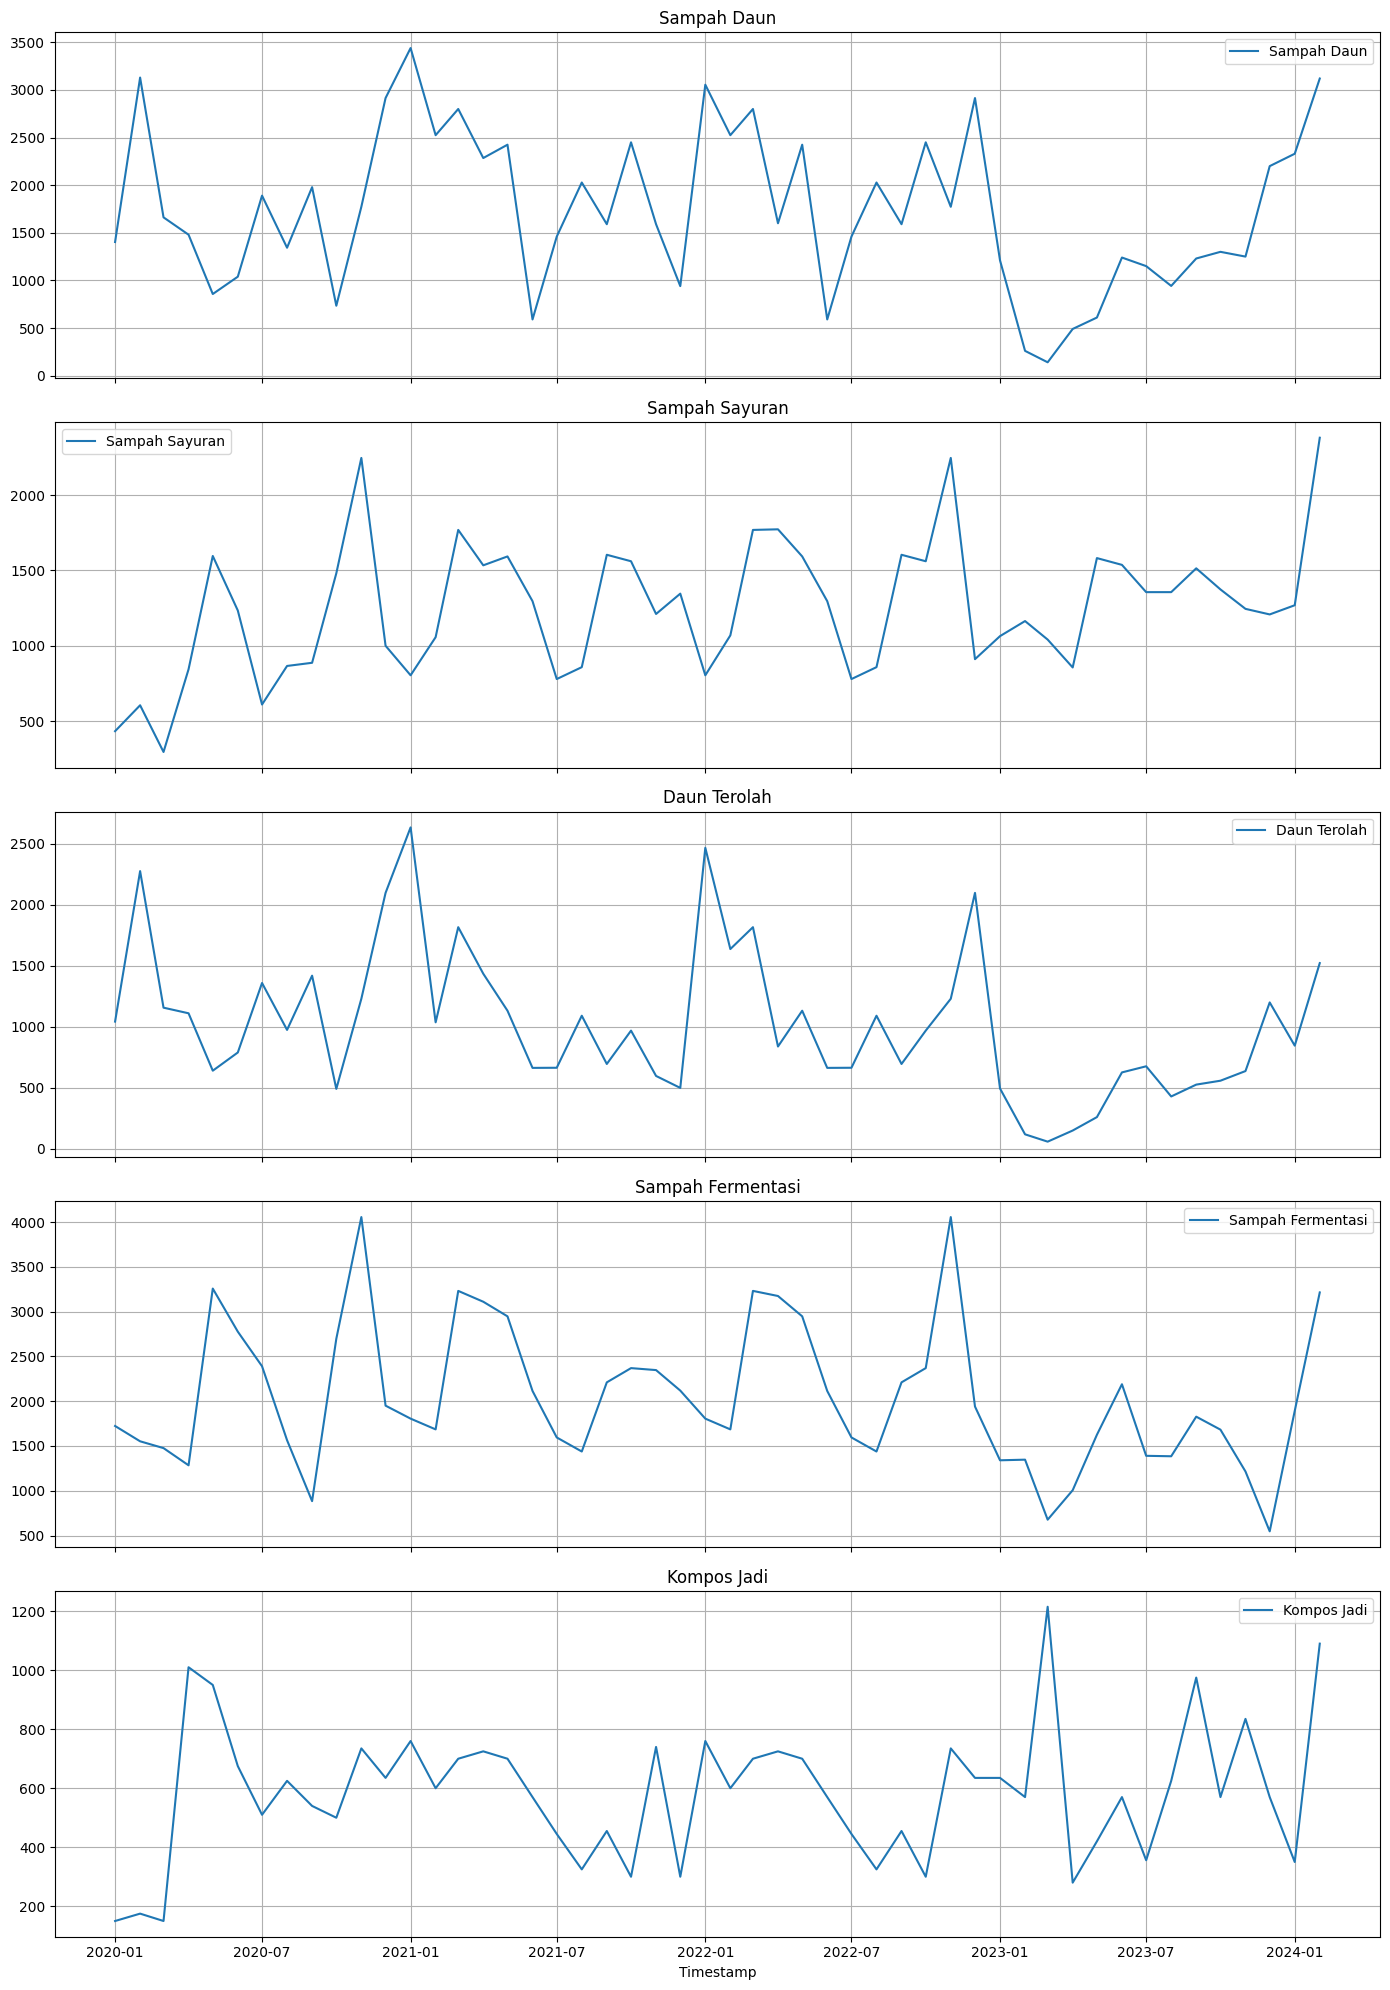

In [9]:
# Membuat figure dan axes untuk subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 20), sharex=True)
# Daftar kolom untuk plot
columns = ['Sampah Daun', 'Sampah Sayuran', 'Daun Terolah', 'Sampah Fermentasi', 'Kompos Jadi']

# Membuat plot untuk setiap kolom
for ax, column in zip(axes, columns):
    ax.plot(df_plot.index, df_plot[column], label=column)
    ax.set_title(column)
    ax.legend()
    ax.grid(True)

# Menambahkan label untuk sumbu x
plt.xlabel('Timestamp')
plt.tight_layout()

# Menampilkan plot
plt.show()

In [10]:
def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [11]:
# ADF Test on each column
for name, column in df.drop(columns='Timestamp').items():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Sampah Daun" 
    -----------------------------------------------
ADF Statistic: -4.266950
p-value: 0.000507
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Stationary


    Augmented Dickey-Fuller Test on "Sampah Sayuran" 
    -----------------------------------------------
ADF Statistic: -4.697305
p-value: 0.000085
Critical Values:
	1%: -3.581
	5%: -2.927
	10%: -2.602
Stationary


    Augmented Dickey-Fuller Test on "Daun Terolah" 
    -----------------------------------------------
ADF Statistic: -4.510936
p-value: 0.000188
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599
Stationary


    Augmented Dickey-Fuller Test on "Sampah Fermentasi" 
    -----------------------------------------------
ADF Statistic: -5.192314
p-value: 0.000009
Critical Values:
	1%: -3.575
	5%: -2.924
	10%: -2.600
Stationary


    Augmented Dickey-Fuller Test on "Kompos Jadi" 
    -----------------------------------------------
ADF Statistic: -4.048683
p-value: 0

In [12]:
df.set_index('Timestamp', inplace=True)
df

Sampah Daun  Sampah Sayuran  Daun Terolah  Sampah Fermentasi  \
Timestamp                                                                  
2020-01-01         1403             433          1043               1723   
2020-02-01         3130             605          2275               1552   
2020-03-01         1662             295          1157               1476   
2020-04-01         1480             844          1111               1284   
2020-05-01          857            1596           641               3257   
2020-06-01         1039            1234           790               2776   
2020-07-01         1890             610          1359               2390   
2020-08-01         1343             866           975               1564   
2020-09-01         1979             887          1419                884   
2020-10-01          734            1481           492               2697   
2020-11-01         1773            2247          1230               4055   
2020-12-01         2915            1000          2097               1950   
2021-01-01         3440             804          2633               1805   
2021-02-01         2525            1057          1037               1685   
2021-03-01         2800            1769          1816               3231   
2021-04-01         2285            1534          1435               3110   
2021-05-01         2425            1593          1132               2947   
2021-06-01          590            1296           664               2114   
2021-07-01         1460             779           665               1595   
2021-08-01         2028             858          1091               1438   
2021-09-01         1590            1604           696               2210   
2021-10-01         2450            1561           969               2369   
2021-11-01         1590            1211           598               2347   
2021-12-01          940            1346           500               2118   
2022-01-01         3055             804          2466               1805   
2022-02-01         2525            1069          1637               1685   
2022-03-01         2800            1769          1816               3231   
2022-04-01         1600            1773           839               3174   
2022-05-01         2425            1593          1132               2947   
2022-06-01          590            1296           664               2114   
2022-07-01         1460             779           665               1595   
2022-08-01         2028             858          1091               1438   
2022-09-01         1590            1604           696               2210   
2022-10-01         2450            1561           969               2369   
2022-11-01         1773            2247          1230               4055   
2022-12-01         2915             911          2097               1940   
2023-01-01         1210            1064           495               1340   
2023-02-01          260            1164           120               1347   
2023-03-01          140            1041            60                677   
2023-04-01          490             856           151               1006   
2023-05-01          610            1582           261               1625   
2023-06-01         1240            1537           627               2189   
2023-07-01         1150            1356           677               1390   
2023-08-01          942            1356           430               1385   
2023-09-01         1230            1514           527               1827   
2023-10-01         1300            1374           559               1682   
2023-11-01         1250            1245           638               1215   
2023-12-01         2200            1208          1200                547   
2024-01-01         2330            1269           846               1891   
2024-02-01         3120            2381          1522               3214   

            Kompos Jadi  
Timestamp                
2020-01

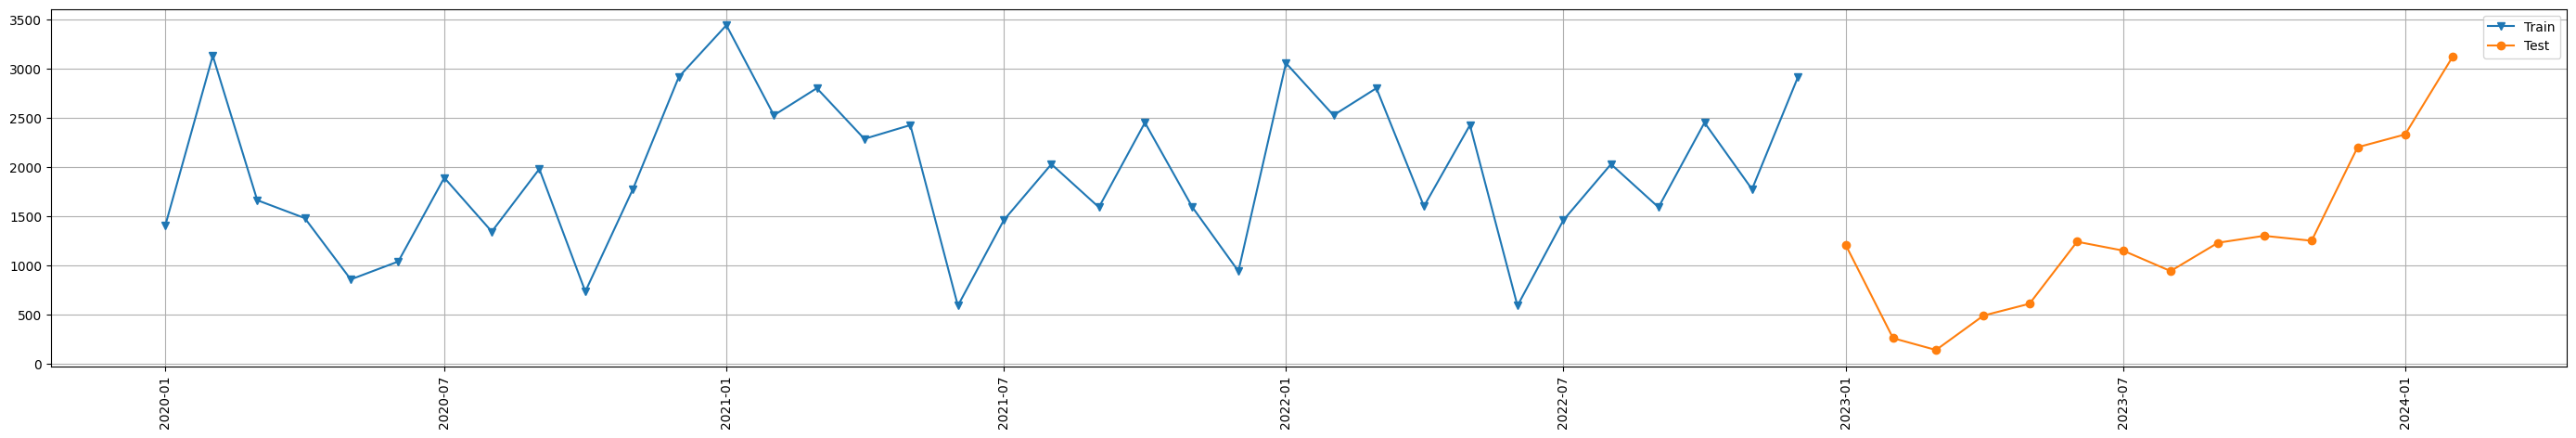

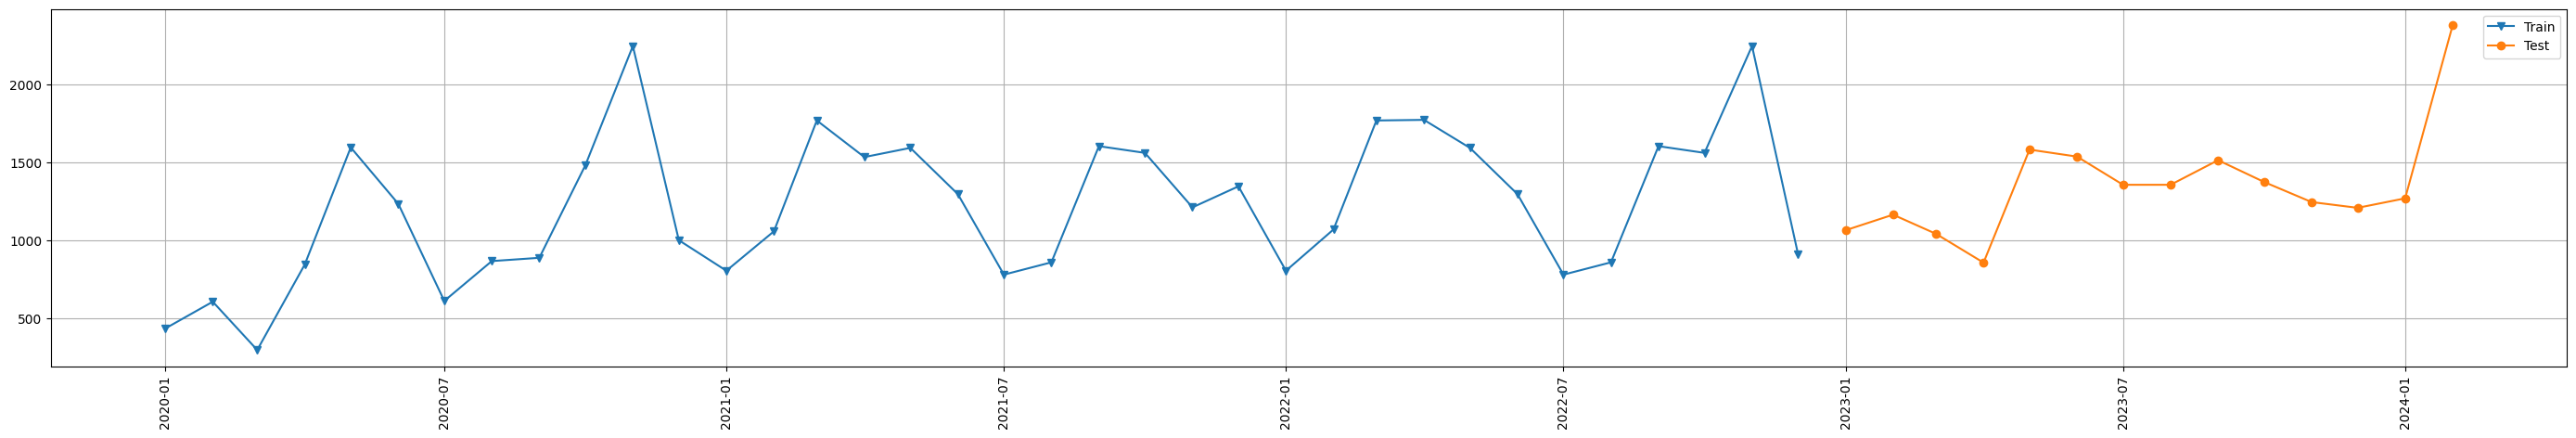

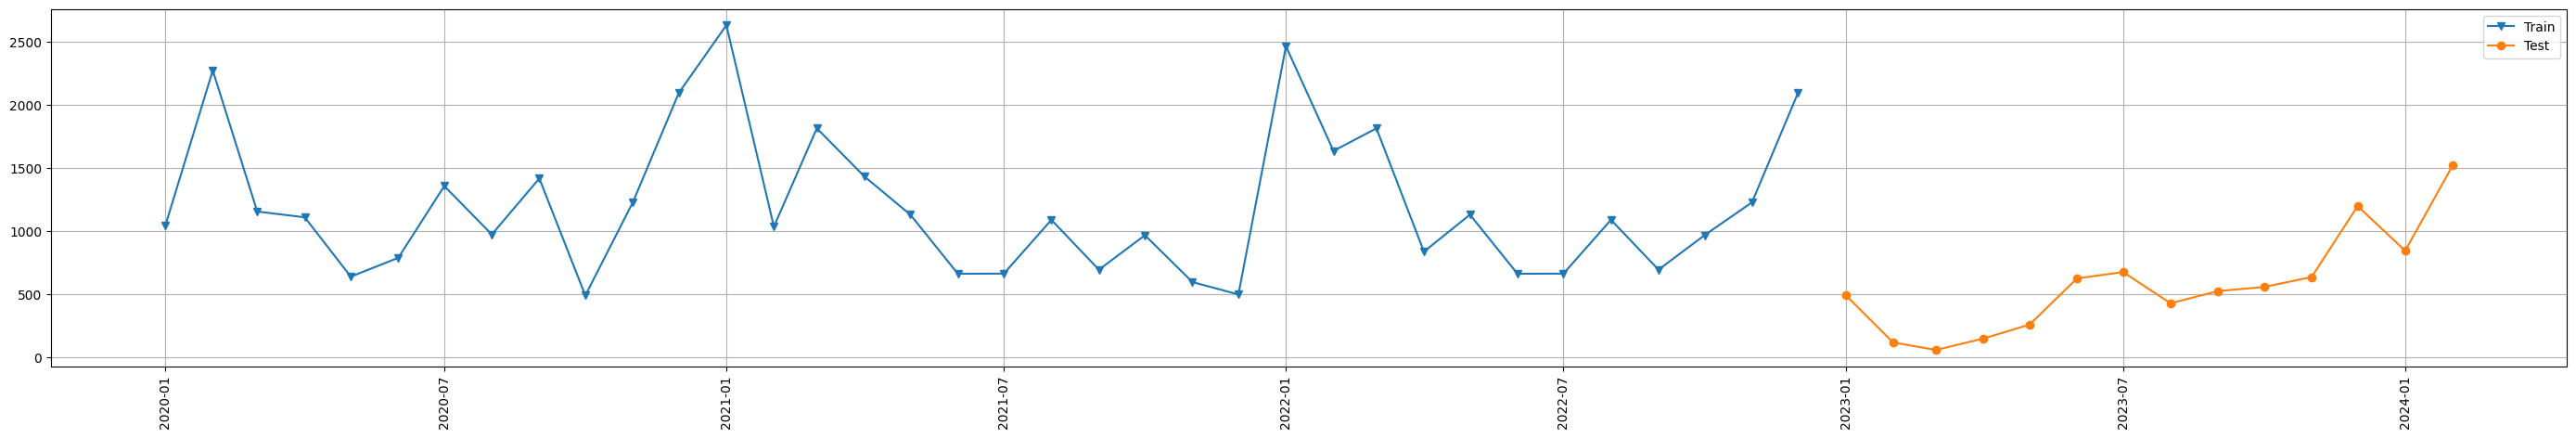

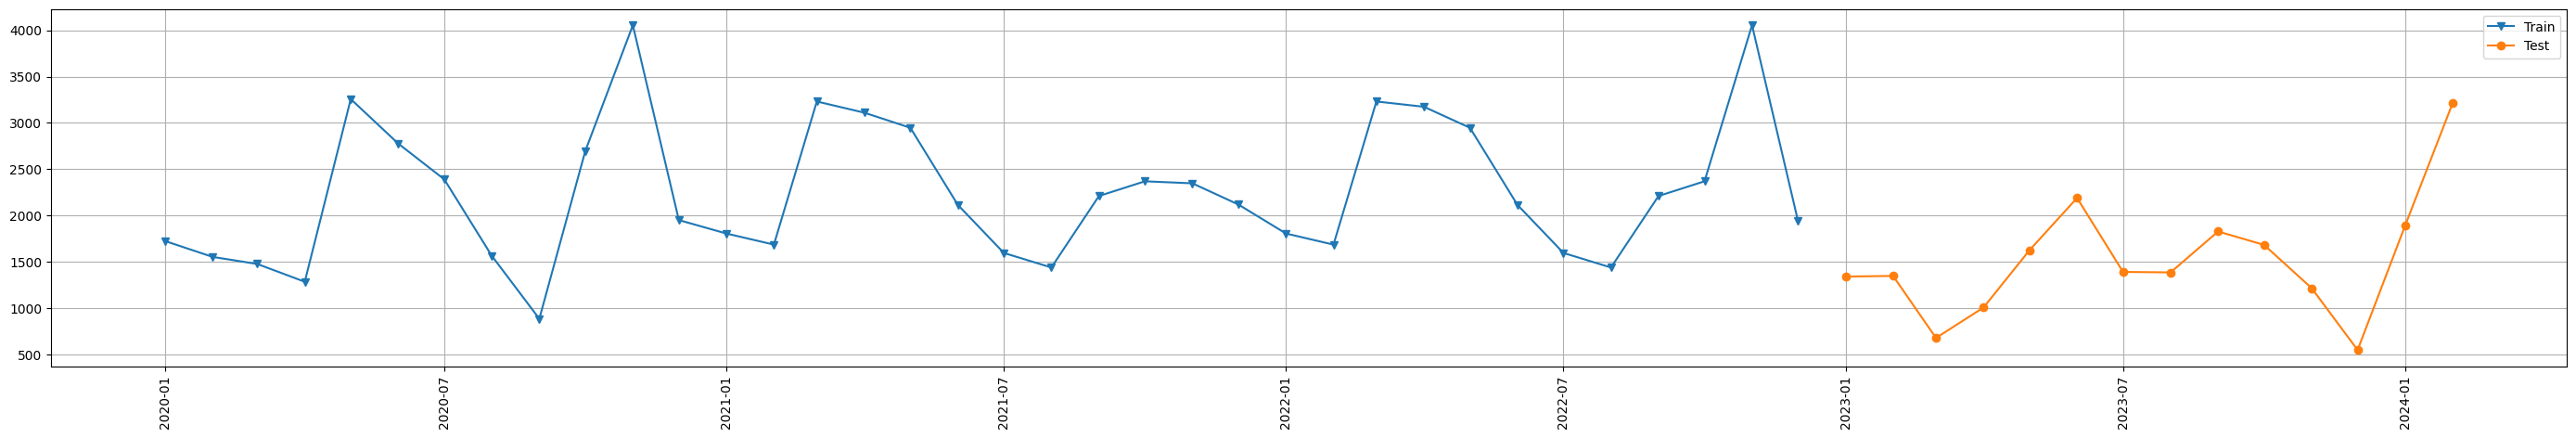

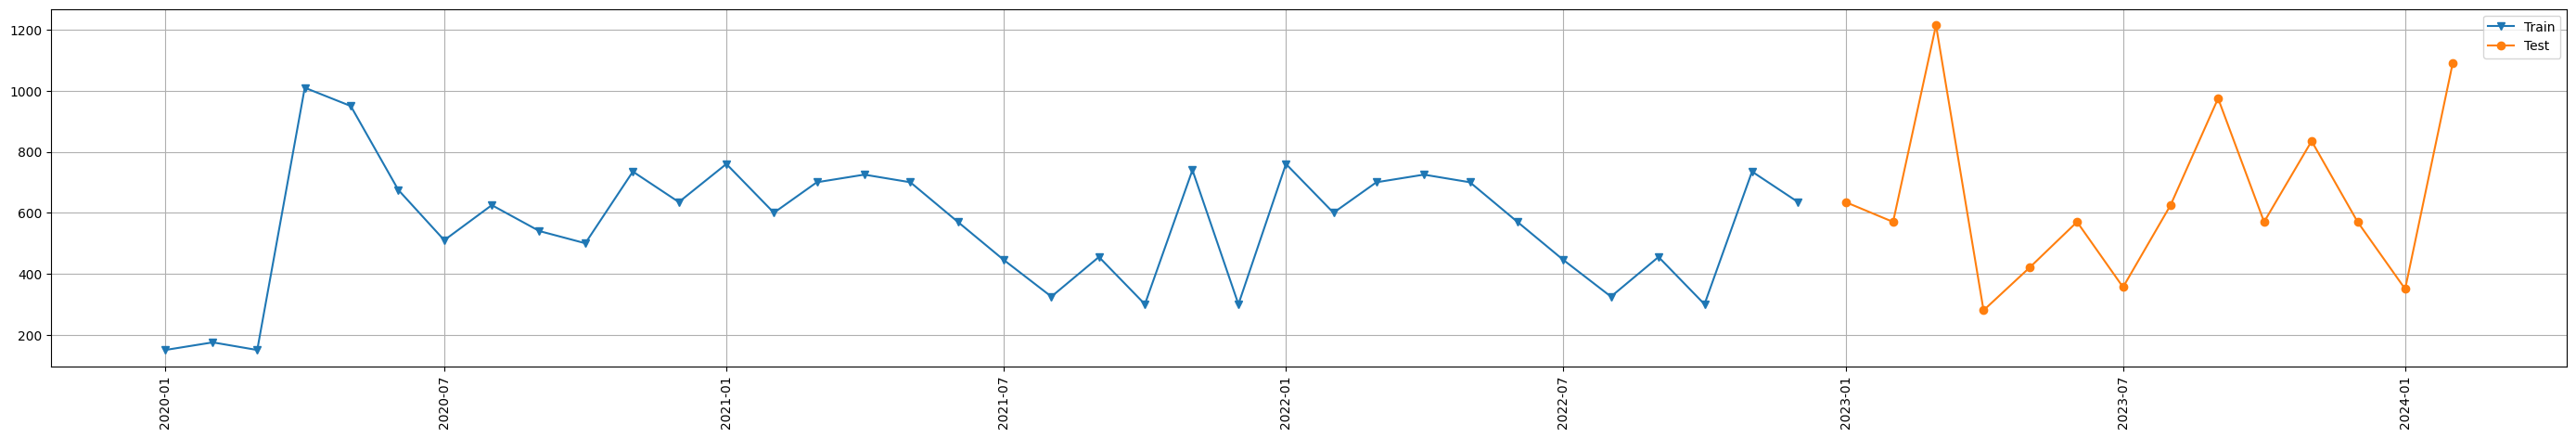

In [13]:
train = df[:-14]
test = df[-14:]

for col in df.columns:
    plt.figure(figsize=(35,5))
    plt.grid()
    plt.plot(train[col], marker='v', label='Train')
    plt.plot( test[col], marker='o', label='Test')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

In [14]:
train.columns

Index(['Sampah Daun', 'Sampah Sayuran', 'Daun Terolah', 'Sampah Fermentasi',
       'Kompos Jadi'],
      dtype='object')

In [15]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train["Kompos Jadi"], X=train.drop(columns=["Kompos Jadi"]), m=14, information_criterion="aicc", trace=True, suppress_warning=True, random_state=42, d=1)

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aicc
 ARIMA(2,1,2)(1,0,1)[14] intercept   : AICC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AICC=489.387, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[14] intercept   : AICC=489.802, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AICC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AICC=486.556, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AICC=492.233, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[14] intercept   : AICC=492.114, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[14] intercept   : AICC=495.126, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[14] intercept   : AICC=487.006, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[14] intercept   : AICC=inf, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[14] intercept   : AICC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[14]          
Total fit time: 2.951 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   36

In [16]:
pred=arima.predict(n_periods=14, X=test.drop(columns=["Kompos Jadi"]))
pred

2023-01-01    496.285246
2023-02-01    521.207704
2023-03-01    505.478152
2023-04-01    455.992154
2023-05-01    591.462529
2023-06-01    595.353456
2023-07-01    590.154562
2023-08-01    558.690358
2023-09-01    576.439967
2023-10-01    553.246513
2023-11-01    555.757267
2023-12-01    587.773902
2024-01-01    500.239721
2024-02-01    752.489769
Freq: MS, dtype: float64

In [18]:
#menghitung nilai MSE
mse=mean_squared_error(test['Kompos Jadi'], pred)
print("Total MSE:",mse)

mae = mean_absolute_error(test['Kompos Jadi'], pred)
print(mae)

Total MSE: 72799.48646368692
197.88438198359228


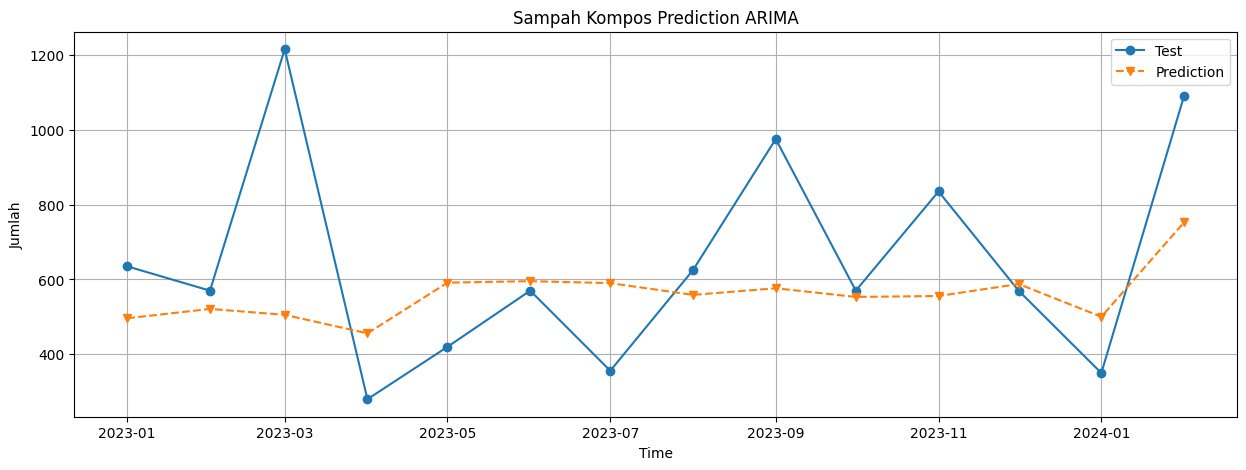

In [19]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(test["Kompos Jadi"],  marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction', linestyle='--')
plt.title('Sampah Kompos Prediction ARIMA')
plt.xlabel('Time')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

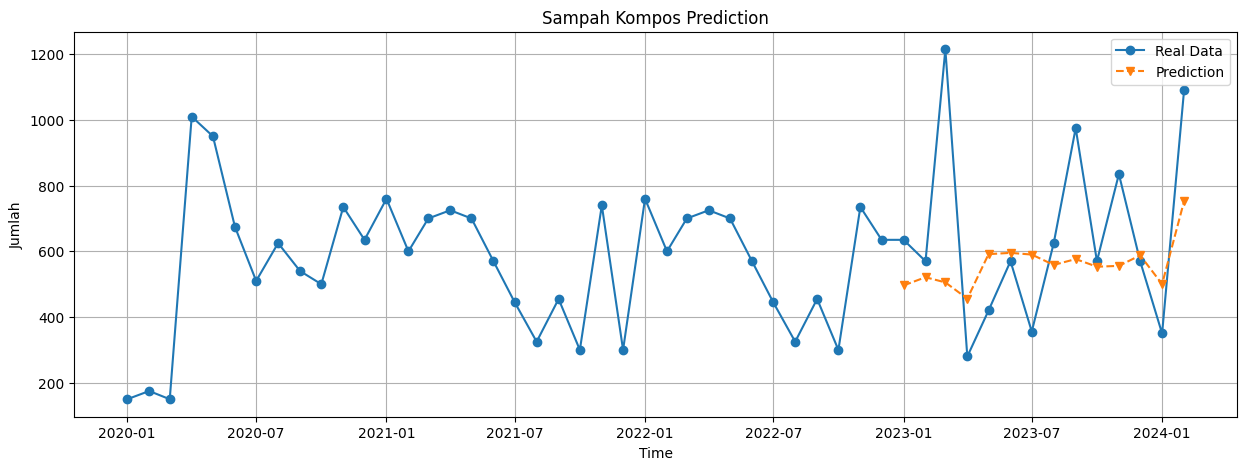

In [20]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(df["Kompos Jadi"],  marker='o', label='Real Data')
plt.plot(pred, marker='v', label='Prediction', linestyle='--')
plt.title('Sampah Kompos Prediction')
plt.xlabel('Time')
plt.ylabel('Jumlah')
plt.legend()
plt.show()